# **Tugas 5 : Keyword Extraction**

**Nama : Adz Dzikry Pradana Putra-210411100093**

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
!pip install Sastrawi
nltk.download('punkt')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

import networkx as nx
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Baca file CSV
df = pd.read_csv("/content/drive/MyDrive/PPW-A/report/Tugas-PPW/hasil_preprocesing.csv")
df.head()

,judul,isi,tanggal,kategori,Hasil cleansing,Hasil case_folding,tokenize,Hasil stopword
0,"Daftar Game PS4, PS5, Xbox, dan PC Rilis Mingg...",Jakarta - Oktober 2024 sudah berjalan selama t...,"Selasa, 08 Okt 2024 14:45 WIB",Games,Jakarta Oktober sudah berjalan selama tujuh ...,jakarta oktober sudah berjalan selama tujuh ...,"['jakarta', 'oktober', 'sudah', 'berjalan', 's...",jakarta oktober berjalan tujuh beragam game me...
1,Studi: Game Single Player Lebih Disukai Gamer ...,Jakarta - Di tengah kepopuleran game multiplay...,"Selasa, 08 Okt 2024 12:15 WIB",Games,Jakarta Di tengah kepopuleran game multiplaye...,jakarta di tengah kepopuleran game multiplaye...,"['jakarta', 'di', 'tengah', 'kepopuleran', 'ga...",jakarta kepopuleran game multiplayer online st...
2,MPL ID S14: Ini Jadwal Playoff dan Bracket Per...,Jakarta - Rangkaian pertandingan di fase liga ...,"Senin, 07 Okt 2024 13:15 WIB",Games,Jakarta Rangkaian pertandingan di fase liga M...,jakarta rangkaian pertandingan di fase liga m...,"['jakarta', 'rangkaian', 'pertandingan', 'di',...",jakarta rangkaian pertandingan fase liga mpl i...
3,Daftar Tim yang Gugur dan Lolos Playoff MPL ID...,Jakarta - MPL ID S14 memasuki babak playoff. S...,"Senin, 07 Okt 2024 11:15 WIB",Games,Jakarta MPL ID S memasuki babak playoff Sudah...,jakarta mpl id s memasuki babak playoff sudah...,"['jakarta', 'mpl', 'id', 's', 'memasuki', 'bab...",jakarta mpl id s memasuki babak playoff enam t...
4,Studi Ungkap Main Game PowerWash Simulator Bai...,"Jakarta - Sebuah studi mengungkapkan, memainka...","Minggu, 06 Okt 2024 15:06 WIB",Games,Jakarta Sebuah studi mengungkapkan memainkan ...,jakarta sebuah studi mengungkapkan memainkan ...,"['jakarta', 'sebuah', 'studi', 'mengungkapkan'...",jakarta studi memainkan salah game square enix...


In [ ]:
# mengambil satu sample berita
sample_berita = df['Hasil stopword'].iloc[68]

sample_berita_list = [sample_berita]
print(sample_berita)

jakarta bahrain vs indonesia tersaji lanjutan ronde ketiga kualifikasi piala dunia awas skuad garuda hilang fokus diserang laser duel timnas bahrain kontra timnas indonesia digelar bahrain national stadium kamis wib grup c ronde ketiga kualifikasi piala dunia bahrain duduk peringkat ketiga poin laga indonesia bawahnya poin jepang mencukur bahrain kandang bahrain pelatih timnas jepang hajime moriyasu jengkel suporter tuan rumah suporter bahrain mengejek lagu kebangsaan jepang teriakan boo pertandingan pemain jepang diganggu serangan laser negara memiliki budaya pandangan berbeda menerima keberagaman dilansir yahoo ejekan lagu kebangsaan timnas bahrain berlaga dewasa harap suporternya upaya mengganggu pemain laser berbahaya tutupnya jepang mencetak gol penalti ayase ueda sang striker dihujani serangan laser mukanya ueda untungnya terganggu sepakannya sempurna masuk gawang ayase ueda dihujani serangan laser suporter bahrain foto screenshotyoutube afc asian cup timnas indonesia menjaga fok

In [ ]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer tanpa batasan jumlah fitur
vectorizer = TfidfVectorizer()

# Fit dan transform teks ke dalam TF-IDF
tfidf_matrix = vectorizer.fit_transform(sample_berita_list)

# Konversi TF-IDF matrix ke DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df

,afc,affcas,asian,awas,ayase,bahrain,bawahnya,berbahaya,berbeda,berlaga,...,tersaji,timnas,tuan,tutupnya,ueda,untungnya,upaya,vs,wib,yahoo
0,0.053074,0.053074,0.053074,0.053074,0.106149,0.530745,0.053074,0.053074,0.053074,0.053074,...,0.053074,0.265372,0.053074,0.053074,0.159223,0.053074,0.053074,0.053074,0.053074,0.053074


In [ ]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_tfidf_1berita = tfidf_df.apply(lambda col: col.map(lambda x: 1 if x >= 0.05 else 0))

# Menampilkan DataFrame dengan nilai biner
df_tfidf_1berita

,afc,affcas,asian,awas,ayase,bahrain,bawahnya,berbahaya,berbeda,berlaga,...,tersaji,timnas,tuan,tutupnya,ueda,untungnya,upaya,vs,wib,yahoo
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_tfidf_1berita.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_tfidf_1berita)):
    features = df_tfidf_1berita.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

            Node  Degree Centrality
0            afc                1.0
1         affcas                1.0
70         piala                1.0
69  pertandingan                1.0
68     peringkat                1.0
..           ...                ...
29        gawang                1.0
28        garuda                1.0
27          foto                1.0
26      fokusnya                1.0
95         yahoo                1.0

[96 rows x 2 columns]


In [ ]:
# Ambil top 10 fitur dengan degree centrality tertinggi
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()

# DataFrame yang difilter berdasarkan top 10 fitur
filtered_df_train_tfidf = df_tfidf_1berita.copy()  # Tetap menyimpan semua fitur

# Tampilkan pesan tentang top 10 fitur yang terpilih
print("\nTop 10 fitur berdasarkan degree centrality:")
print(top_10_features)

# Tampilkan DataFrame asli yang masih memiliki semua fitur
print("\nDataFrame asli dengan semua fitur (tanpa menghapus):")
print(filtered_df_train_tfidf)


Top 10 fitur berdasarkan degree centrality:
['afc', 'affcas', 'piala', 'pertandingan', 'peringkat', 'penalti', 'pemain', 'pelatih', 'pandangan', 'negara']

DataFrame asli dengan semua fitur (tanpa menghapus):
   afc  affcas  asian  awas  ayase  bahrain  bawahnya  berbahaya  berbeda  \
0    1       1      1     1      1        1         1          1        1   

   berlaga  ...  tersaji  timnas  tuan  tutupnya  ueda  untungnya  upaya  vs  \
0        1  ...        1       1     1         1     1          1      1   1   

   wib  yahoo  
0    1      1  

[1 rows x 96 columns]


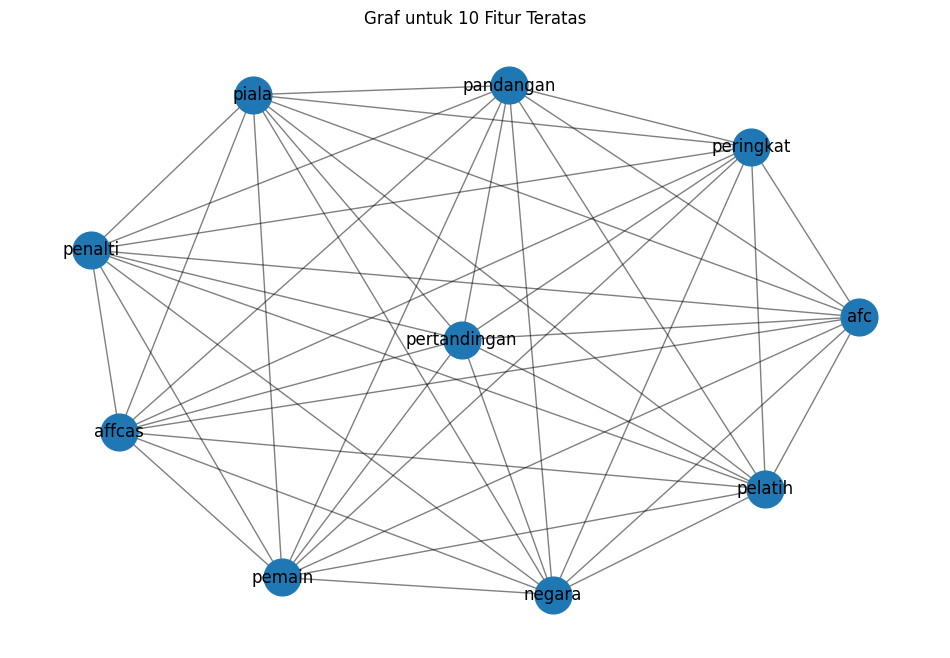

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Pastikan df_tfidf_1berita adalah nama yang benar dari dataframe yang mengandung data biner (TF-IDF)
if 'df_tfidf_1berita' in locals():  # Memeriksa apakah dataframe df_tfidf_1berita sudah ada
    # Menambahkan edge berdasarkan co-occurrence dari fitur teratas
    for i in range(len(df_tfidf_1berita)):  # Pastikan dataframe ini ada dan ukurannya benar
        features = df_tfidf_1berita.iloc[i]
        active_features = features[features == 1].index.tolist()
        active_top_10_features = [f for f in active_features if f in top_10_features]

        for j in range(len(active_top_10_features)):
            for k in range(j + 1, len(active_top_10_features)):
                G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

    # Mengatur ukuran figure untuk visualisasi graf
    plt.figure(figsize=(12, 8))

    # Menggambar graf fitur teratas
    pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
    nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
    nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
    nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

    # Menampilkan graf
    plt.title('Graf untuk 10 Fitur Teratas')
    plt.axis('off')  # Menyembunyikan sumbu
    plt.show()
else:
    print("DataFrame 'df_tfidf_1berita' tidak ditemukan. Pastikan proses TF-IDF sudah dilakukan.")


In [ ]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

           Node  Degree Centrality  Closeness Centrality  \
0           afc                1.0                   1.0   
1        affcas                1.0                   1.0   
2         piala                1.0                   1.0   
3  pertandingan                1.0                   1.0   
4     peringkat                1.0                   1.0   
5       penalti                1.0                   1.0   
6        pemain                1.0                   1.0   
7       pelatih                1.0                   1.0   
8     pandangan                1.0                   1.0   
9        negara                1.0                   1.0   

   Betweenness Centrality  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
5                     0.0  
6                     0.0  
7                     0.0  
8                     0.0  
9                     0.0  


In [ ]:
# Mengambil kata kunci dengan nilai TF-IDF tertinggi untuk setiap dokumen
kata_kunci = df_tfidf_1berita.idxmax(axis=1)
print("\nKata kunci dari setiap dokumen:")
for i, kata in enumerate(kata_kunci):
    print(f"Dokumen {i+1}: {kata}")


Kata kunci dari setiap dokumen:
Dokumen 1: afc
